<a href="https://colab.research.google.com/github/yuseifer/TFM_2024/blob/main/Graficos_tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym==0.17.3
!pip install pybullet==3.2.6
!pip install stable_baselines3[extra]
!pip install shimmy==1.2.1
!pip install gymnasium==0.28.1
!pip install tensorboardX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.4 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.17.3-py3-none-any.whl size=1654616 sha256=df138cce4871e5752fc46c7140eede8d54173301e6a90bd2694484c2ef821da9
  Stored in directory: /root/.cache/pip/wheels/af/4b/74/fcfc8238472c34d7f96508a63c962ff3ac9485a9a4137afd4e
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.1.0
    Uninstalling cloudpickle-3.1.0:
      Successfully uninstalled cloudpickle-3.1.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires cloudpickl

In [ ]:
import gym
import pybullet, pybullet_envs
import torch as th

from stable_baselines3 import PPO

from stable_baselines3 import TD3
from stable_baselines3 import SAC
from stable_baselines3.common.evaluation import evaluate_policy

/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py:604: UserWarning: WARN: plugin: shimmy.registration:register_gymnasium_envs raised Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gymnasium/envs/registration.py", line 602, in load_plugin_envs
    fn()
  File "/usr/local/lib/python3.10/dist-packages/shimmy/registration.py", line 304, in register_gymnasium_envs
    _register_atari_envs()
  File "/usr/local/lib/python3.10/dist-packages/shimmy/registration.py", line 205, in _register_atari_envs
    import ale_py
  File "/usr/local/lib/python3.10/dist-packages/ale_py/__init__.py", line 68, in <module>
    register_v0_v4_envs()
  File "/usr/local/lib/python3.10/dist-packages/ale_py/registration.py", line 178, in register_v0_v4_envs
    _register_rom_configs(legacy_games, obs_types, versions)
  File "/usr/local/lib/python3.10/dist-packages/ale_py/registration.py", line 63, in _register_rom_configs
    gymnasium.register(
AttributeError:

In [ ]:
import pybullet_envs
env = gym.make("AntBulletEnv-v0")

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback

# Crear el callback de evaluación, evaluando cada 10,000 steps y guardando el mejor modelo
eval_callback = EvalCallback(env, best_model_save_path='./logs/best_model/',
                             log_path='./logs/eval/', eval_freq=10000,
                             deterministic=True, render=False)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:77: UserWarning: The `render_mode` attribute is not defined in your environment. It will be set to None.
  warnings.warn("The `render_mode` attribute is not defined in your environment. It will be set to None.")


In [ ]:
MAX_AVERAGE_SCORE = 100000
#Definimos la arquitectura de la red
policy_kwargs = dict(activation_fn=th.nn.LeakyReLU, net_arch=[512, 512])

#TD3

In [ ]:
model = TD3('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=10000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("TD3_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 829      |
|    ep_rew_mean     | 307      |
| time/              |          |
|    episodes        | 10       |
|    fps             | 138      |
|    time_elapsed    | 60       |
|    total_timesteps | 8294     |
| train/             |          |
|    actor_loss      | -8.68    |
|    critic_loss     | 0.0873   |
|    learning_rate   | 0.0003   |
|    n_updates       | 8193     |
---------------------------------
Eval num_timesteps=10000, episode_reward=317.99 +/- 20.97
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 318      |
| time/              |          |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | -10.1    |
|    critic_loss     | 0.0853   |
|    learning_rate   | 0.0003   |
|    n_updates       | 9899     |
-------------------------

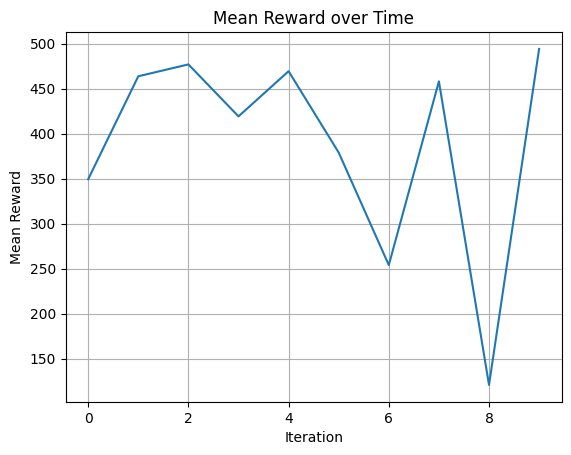

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

#PPO

In [ ]:
model = PPO('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=10000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("PPO_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

Eval num_timesteps=10000, episode_reward=8.22 +/- 0.04
Episode length: 20.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 20          |
|    mean_reward          | 8.22        |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.008164197 |
|    clip_fraction        | 0.11        |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | 0.915       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.41        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.00816    |
|    std                  | 0.989       |
|    value_loss           | 1.61        |
-----------------------------------------


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward  8.14665
Eval num_timesteps=9760, episode_reward=7.83 +/- 0.10
Episode length: 20.00 +/- 0.00
----------------------------------------
| eval/                   |            |
|    mean_ep_length       | 20         |
|    mean_reward          | 7.83       |
| time/                   |            |
|    total_timesteps      | 9760       |
| train/                  |            |
|    approx_kl            | 0.01266641 |
|    clip_fraction        | 0.127      |
|    clip_range           | 0.2        |
|    entropy_loss         | -11.2      |
|    explained_variance   | 0.301      |
|    learning_rate        | 0.0003     |
|    loss                 | 0.726      |
|    n_updates            | 90         |
|    policy_gradient_loss | -0.0151    |
|    std                  | 0.978      |
|    value_loss           | 2.87       |
----------------------------------------
mean_reward  8.8667032
Eval num_timesteps=9520, episode_reward=652.69 +/- 52.75
Episode length: 1000.00 +/- 0.00
--

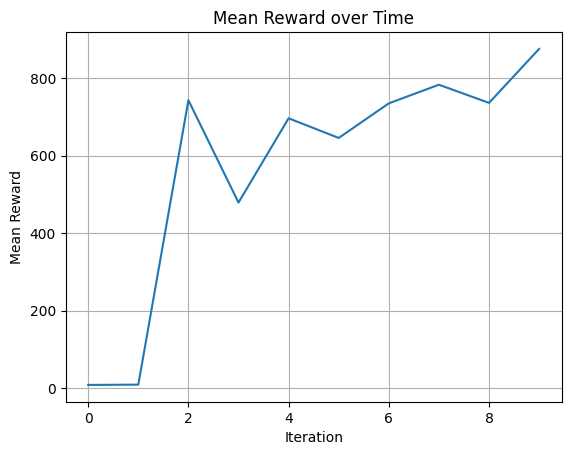

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

['timesteps', 'results', 'ep_lengths']


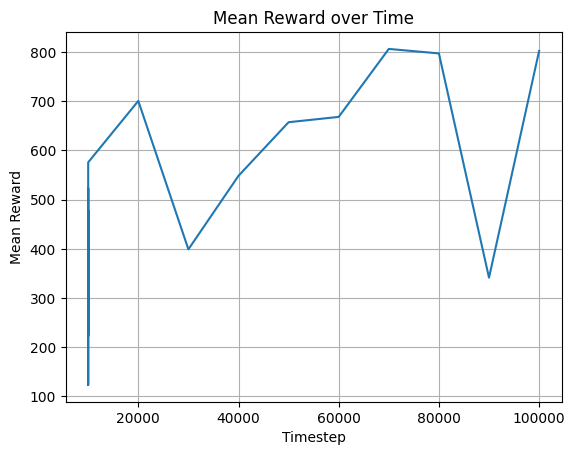

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npz
eval_data = np.load('./logs/eval/evaluations.npz')

# Listar las claves en el archivo .npz
print(eval_data.files)

# Supongamos que el archivo tiene las claves 'results' y 'timesteps'
# Acceder a los datos
results = eval_data['results']
timesteps = eval_data['timesteps']

# Calcular la recompensa promedio si es necesario (depende del formato de results)
mean_rewards = results.mean(axis=1)  # Promedio de recompensas por evaluación

# Graficar las recompensas promedio
plt.plot(timesteps, mean_rewards)
plt.xlabel('Timestep')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

#SAC

In [ ]:
model = SAC('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=10000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("SAC_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 536      |
|    ep_rew_mean     | 259      |
| time/              |          |
|    episodes        | 10       |
|    fps             | 72       |
|    time_elapsed    | 74       |
|    total_timesteps | 5356     |
| train/             |          |
|    actor_loss      | -67.4    |
|    critic_loss     | 0.563    |
|    ent_coef        | 0.209    |
|    ent_coef_loss   | -19.2    |
|    learning_rate   | 0.0003   |
|    n_updates       | 5255     |
---------------------------------


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=355.41 +/- 38.76
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 355      |
| time/              |          |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | -95      |
|    critic_loss     | 1.24     |
|    ent_coef        | 0.0945   |
|    ent_coef_loss   | -1.99    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9899     |
---------------------------------
New best mean reward!
mean_reward  332.2489376
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 659      |
|    ep_rew_mean     | 264      |
| time/              |          |
|    episodes        | 10       |
|    fps             | 80       |
|    time_elapsed    | 81       |
|    total_timesteps | 6588     |
| train/             |          |
|    actor_loss      | -133     |
|    critic_

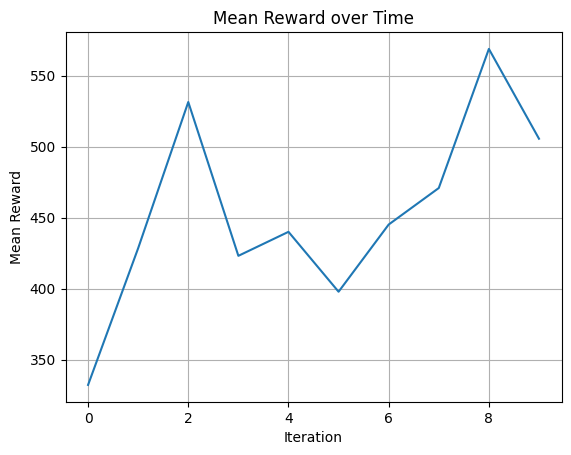

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npz
eval_data = np.load('./logs/eval/evaluations.npz')

# Listar las claves en el archivo .npz
print(eval_data.files)

# Supongamos que el archivo tiene las claves 'results' y 'timesteps'
# Acceder a los datos
results = eval_data['results']
timesteps = eval_data['timesteps']

# Calcular la recompensa promedio si es necesario (depende del formato de results)
mean_rewards = results.mean(axis=1)  # Promedio de recompensas por evaluación

# Graficar las recompensas promedio
plt.plot(timesteps, mean_rewards)
plt.xlabel('Timestep')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

#Fase 100000

In [ ]:
import pybullet_envs
env = gym.make("AntBulletEnv-v0")

In [ ]:
from stable_baselines3.common.callbacks import EvalCallback

# Crear el callback de evaluación, evaluando cada 10,000 steps y guardando el mejor modelo
eval_callback = EvalCallback(env, best_model_save_path='./logs/best_model/',
                             log_path='./logs/eval/', eval_freq=10000,
                             deterministic=True, render=False)

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
MAX_AVERAGE_SCORE = 100000
#Definimos la arquitectura de la red
policy_kwargs = dict(activation_fn=th.nn.LeakyReLU, net_arch=[512, 512])

#TD3

In [ ]:
model = TD3('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=100000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("TD3_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

Streaming output truncated to the last 5000 lines.
| time/              |          |
|    total_timesteps | 26480    |
| train/             |          |
|    actor_loss      | -32.1    |
|    critic_loss     | 1.5      |
|    learning_rate   | 0.0003   |
|    n_updates       | 625779   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 139      |
|    ep_rew_mean     | 190      |
| time/              |          |
|    episodes        | 190      |
|    fps             | 136      |
|    time_elapsed    | 196      |
|    total_timesteps | 26750    |
| train/             |          |
|    actor_loss      | -30.3    |
|    critic_loss     | 2.18     |
|    learning_rate   | 0.0003   |
|    n_updates       | 626049   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 140      |
|    ep_rew_mean     | 191      |
| time/              |         

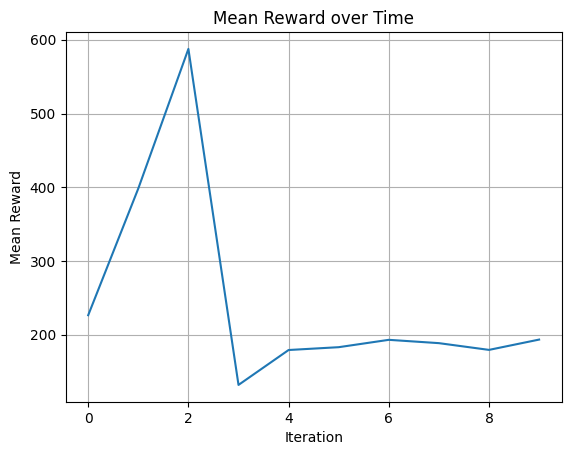

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

['timesteps', 'results', 'ep_lengths']


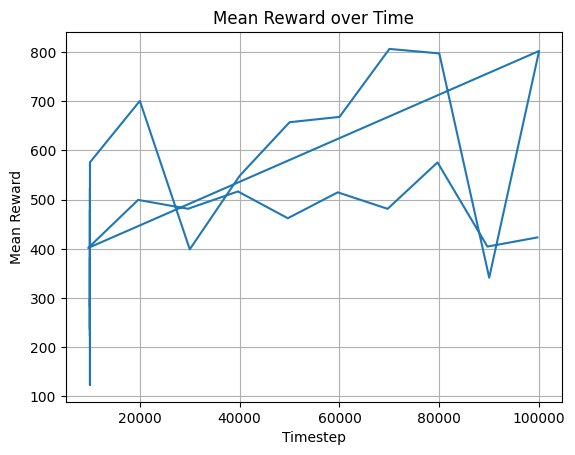

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npz
eval_data = np.load('./logs/eval/evaluations.npz')

# Listar las claves en el archivo .npz
print(eval_data.files)

# Supongamos que el archivo tiene las claves 'results' y 'timesteps'
# Acceder a los datos
results = eval_data['results']
timesteps = eval_data['timesteps']

# Calcular la recompensa promedio si es necesario (depende del formato de results)
mean_rewards = results.mean(axis=1)  # Promedio de recompensas por evaluación

# Graficar las recompensas promedio
plt.plot(timesteps, mean_rewards)
plt.xlabel('Timestep')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

#PPO

In [ ]:
model = PPO('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=100000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("PPO_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

Eval num_timesteps=10000, episode_reward=10.13 +/- 0.35
Episode length: 20.20 +/- 0.40
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 20.2        |
|    mean_reward          | 10.1        |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.016721161 |
|    clip_fraction        | 0.188       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.3       |
|    explained_variance   | 0.808       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.19        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0229     |
|    std                  | 0.992       |
|    value_loss           | 1.51        |
-----------------------------------------


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


New best mean reward!
Eval num_timesteps=20000, episode_reward=514.16 +/- 10.39
Episode length: 1000.00 +/- 0.00
-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1e+03       |
|    mean_reward          | 514         |
| time/                   |             |
|    total_timesteps      | 20000       |
| train/                  |             |
|    approx_kl            | 0.014140195 |
|    clip_fraction        | 0.159       |
|    clip_range           | 0.2         |
|    entropy_loss         | -11.1       |
|    explained_variance   | 0.902       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.152       |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0184     |
|    std                  | 0.965       |
|    value_loss           | 0.526       |
-----------------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |

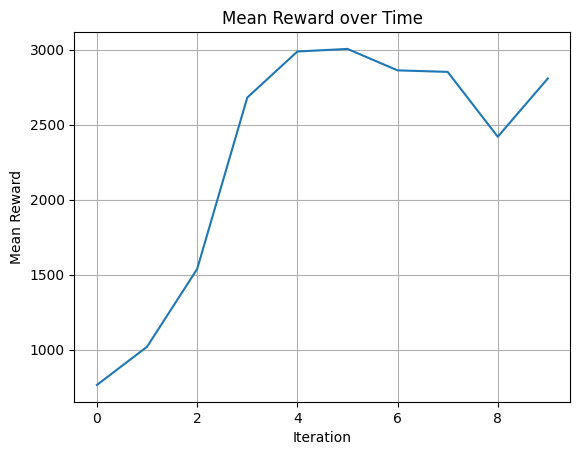

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

['timesteps', 'results', 'ep_lengths']


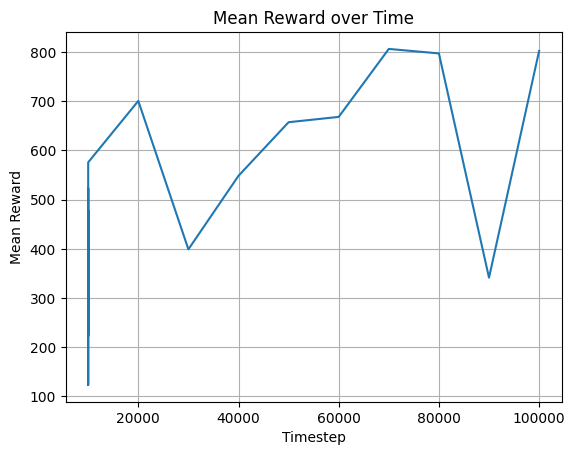

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npz
eval_data = np.load('./logs/eval/evaluations.npz')

# Listar las claves en el archivo .npz
print(eval_data.files)

# Supongamos que el archivo tiene las claves 'results' y 'timesteps'
# Acceder a los datos
results = eval_data['results']
timesteps = eval_data['timesteps']

# Calcular la recompensa promedio si es necesario (depende del formato de results)
mean_rewards = results.mean(axis=1)  # Promedio de recompensas por evaluación

# Graficar las recompensas promedio
plt.plot(timesteps, mean_rewards)
plt.xlabel('Timestep')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

#SAC

In [ ]:
model = SAC('MlpPolicy', env,learning_rate=0.0003,policy_kwargs=policy_kwargs, verbose=1)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
mean_rewards = []
for _ in range(10):
  model.learn(total_timesteps=100000,log_interval = 10,callback=eval_callback)
  # Save the agent
  model.save("SAC_Ant")
  mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=5)
  mean_rewards.append(mean_reward)
  print("mean_reward ", mean_reward)
del model

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 640      |
|    ep_rew_mean     | 320      |
| time/              |          |
|    episodes        | 10       |
|    fps             | 72       |
|    time_elapsed    | 87       |
|    total_timesteps | 6401     |
| train/             |          |
|    actor_loss      | -68.5    |
|    critic_loss     | 1.08     |
|    ent_coef        | 0.154    |
|    ent_coef_loss   | -22.6    |
|    learning_rate   | 0.0003   |
|    n_updates       | 6300     |
---------------------------------


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=10000, episode_reward=371.10 +/- 118.75
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 371      |
| time/              |          |
|    total_timesteps | 10000    |
| train/             |          |
|    actor_loss      | -82.7    |
|    critic_loss     | 2.63     |
|    ent_coef        | 0.0781   |
|    ent_coef_loss   | -2.66    |
|    learning_rate   | 0.0003   |
|    n_updates       | 9899     |
---------------------------------
New best mean reward!
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 713      |
|    ep_rew_mean     | 334      |
| time/              |          |
|    episodes        | 20       |
|    fps             | 71       |
|    time_elapsed    | 198      |
|    total_timesteps | 14255    |
| train/             |          |
|    actor_loss      | -95.4    |
|    critic_loss     | 0.696    |
| 

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=50000, episode_reward=1737.68 +/- 402.92
Episode length: 1000.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 1e+03    |
|    mean_reward     | 1.74e+03 |
| time/              |          |
|    total_timesteps | 50000    |
| train/             |          |
|    actor_loss      | -105     |
|    critic_loss     | 0.513    |
|    ent_coef        | 0.0212   |
|    ent_coef_loss   | -1.2     |
|    learning_rate   | 0.0003   |
|    n_updates       | 449499   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 883      |
|    ep_rew_mean     | 1.14e+03 |
| time/              |          |
|    episodes        | 60       |
|    fps             | 71       |
|    time_elapsed    | 743      |
|    total_timesteps | 53000    |
| train/             |          |
|    actor_loss      | -107     |
|    critic_loss     | 0.495    |
|    ent_coef        | 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(mean_rewards)
plt.xlabel('Iteration')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()

NameError: name 'mean_rewards' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo .npz
eval_data = np.load('./logs/eval/evaluations.npz')

# Listar las claves en el archivo .npz
print(eval_data.files)

# Supongamos que el archivo tiene las claves 'results' y 'timesteps'
# Acceder a los datos
results = eval_data['results']
timesteps = eval_data['timesteps']

# Calcular la recompensa promedio si es necesario (depende del formato de results)
mean_rewards = results.mean(axis=1)  # Promedio de recompensas por evaluación

# Graficar las recompensas promedio
plt.plot(timesteps, mean_rewards)
plt.xlabel('Timestep')
plt.ylabel('Mean Reward')
plt.title('Mean Reward over Time')
plt.grid()
plt.show()